In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def classify(model, X, y):
    skf = StratifiedKFold()
    yp = cross_val_predict(model, X, y, cv=skf)
    acc = accuracy_score(y,yp)*100
    pre = precision_score(y, yp)*100
    rec = recall_score(y,yp)*100
    return (acc, pre, rec)

In [3]:
def run(model, df):
    results = []
    for filetype in np.unique(df['filetype']):
        cond1 = df['filetype'] == filetype
        X = df[cond1].drop(['class', 'filetype', 'algorithm'], axis=1)
        y = df[cond1]['class']
        acc, pre, rec = classify(model, X, y)
        results.append([filetype, acc, pre, rec])
    return results

In [4]:
def plot_results(results, model_name):
    results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
    results.plot.bar(x='filetype')
    plt.legend(loc='lower right')
    plt.ylabel('percentage (%)')
    plt.title('classification results (%s)' % model_name);

In [5]:
df = pd.read_csv('features.csv')
pd.set_option('mode.use_inf_as_na', True)
df.fillna(0, inplace=True)

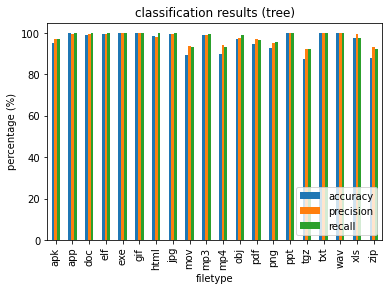

In [6]:
plot_results(run(Tree(), df), 'tree')

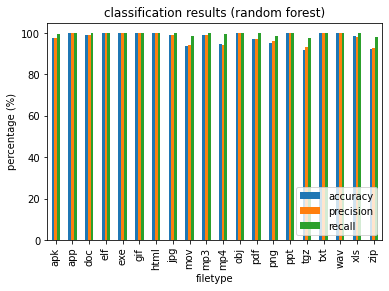

In [7]:
plot_results(run(RandomForestClassifier(), df), 'random forest')

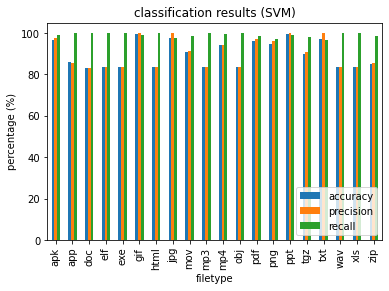

In [8]:
plot_results(run(SVC(gamma='auto'), df), 'SVM')

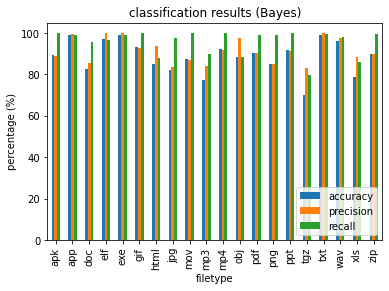

In [9]:
plot_results(run(GaussianNB(), df), 'Bayes')

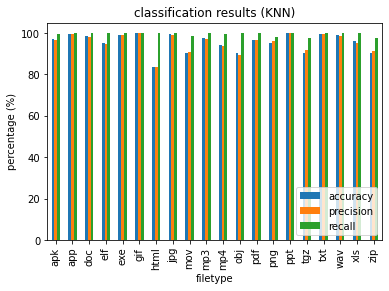

In [10]:
plot_results(run(KNeighborsClassifier(), df), 'KNN')

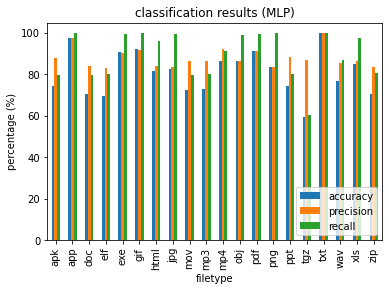

In [11]:
# copy the data
norm = df.copy()
  
# apply normalization techniques
for column in ['kurtosis','entropy','stdev','chi','autocorr','mean']:
    norm[column] = norm[column]  / norm[column].abs().max()
    
plot_results(run(MLPClassifier(), norm), 'MLP')

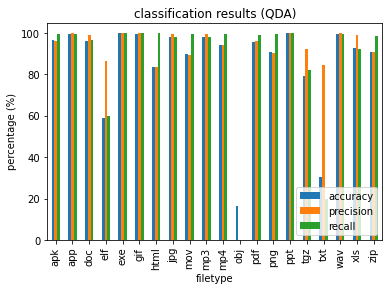

In [12]:
plot_results(run(QuadraticDiscriminantAnalysis(), df), 'QDA')

In [13]:
X = df.drop(['class', 'algorithm', 'filetype'], axis=1)
y = df['class']
skf = StratifiedKFold()
yp = cross_val_predict(RandomForestClassifier(), X, y, cv=skf)
acc = accuracy_score(y,yp)*100
pre = precision_score(y, yp)*100
rec = recall_score(y,yp)*100
print(acc, pre, rec)

95.87820184113495 95.89564380809553 99.30408028715844


apk 96.87280393534786 96.89126266776226 99.43780744905129
app 99.12280701754386 99.84848484848486 99.09774436090225
doc 98.86524822695036 99.65724078834619 98.97872340425532
elf 96.42857142857143 100.0 95.71428571428572
exe 99.60317460317461 100.0 99.52380952380952
gif 99.41203075531433 99.9590387766248 99.33514246947082
html 100.0 100.0 100.0
jpg 99.07692307692308 99.62940086473132 99.26153846153845
mov 91.62857142857142 91.46559898851544 99.21142857142857
mp3 99.5 100.0 99.4
mp4 94.60055096418732 94.46714869537881 99.3388429752066
obj 100.0 100.0 100.0
pdf 96.93227091633466 97.21875 99.15537848605578
png 94.47751322751323 94.53065859197578 99.10714285714286
ppt 99.52612112806287 99.98605494352252 99.44521497919555
tgz 90.64386317907444 90.28487947406866 99.47686116700201
txt 99.60317460317461 100.0 99.52380952380952
wav 99.23611111111111 100.0 99.08333333333333
xls 97.6608187134503 98.59649122807016 98.59649122807016
zip 92.13541666666667 91.80611656087709 99.4375


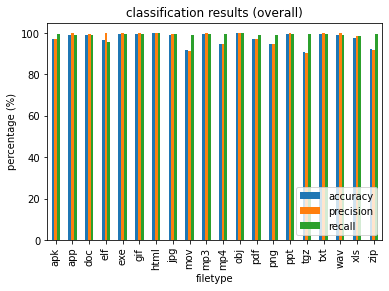

In [14]:
results = []
for filetype in np.unique(df['filetype']):
    cond1 = df['filetype'] == filetype
    acc = accuracy_score(y[cond1],yp[cond1])*100
    pre = precision_score(y[cond1],yp[cond1])*100
    rec = recall_score(y[cond1],yp[cond1])*100
    print(filetype, acc, pre, rec)
    results.append([filetype, acc, pre, rec])
    
results = pd.DataFrame(results, columns=['filetype', 'accuracy', 'precision', 'recall'])
results.plot.bar(x='filetype')
plt.legend(loc='lower right')
plt.ylabel('percentage (%)')
plt.title('classification results (overall)');